# **Lab 7**

#### **3: Make nice figures**

Now use matplotlib to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted matplotlib figures with multiple plots. Note that the plots in the paper are actually wrong!

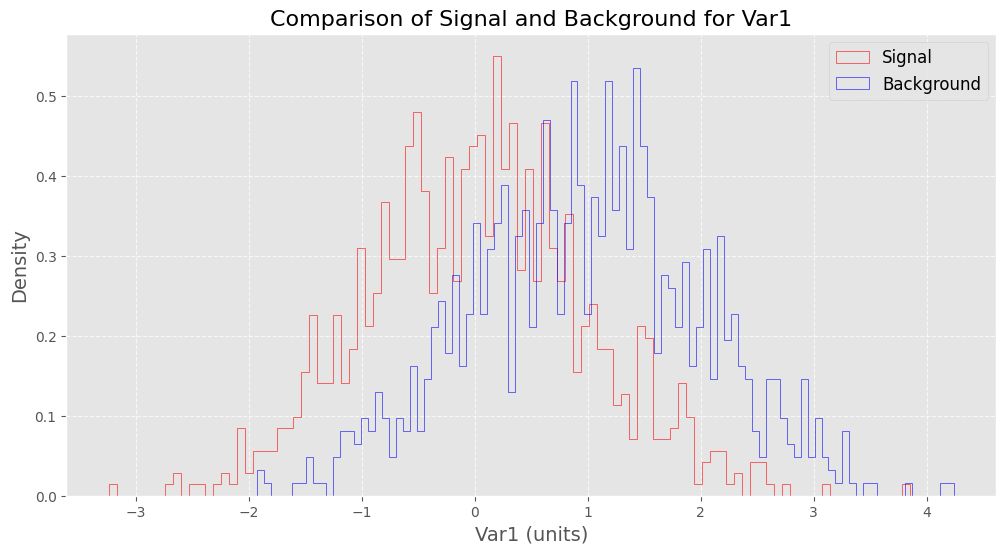

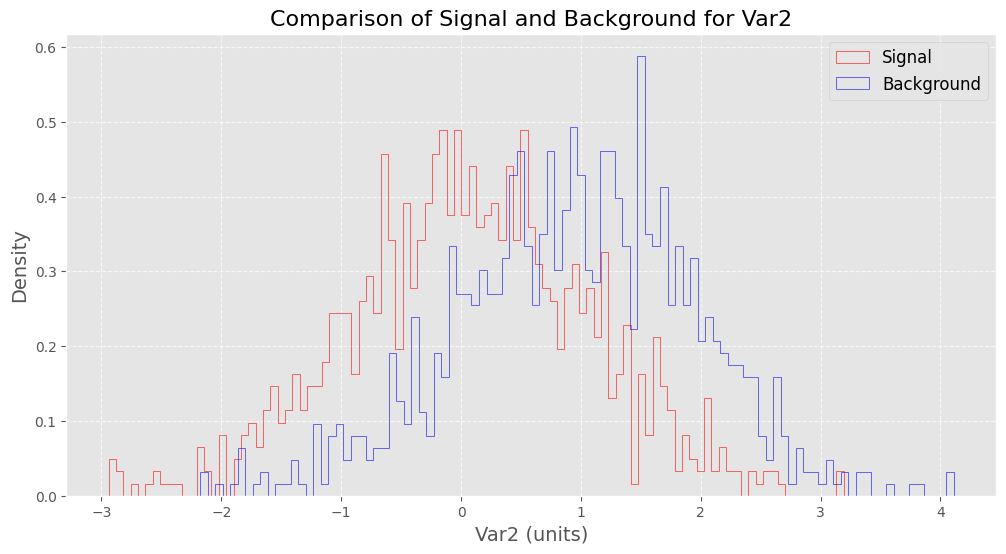

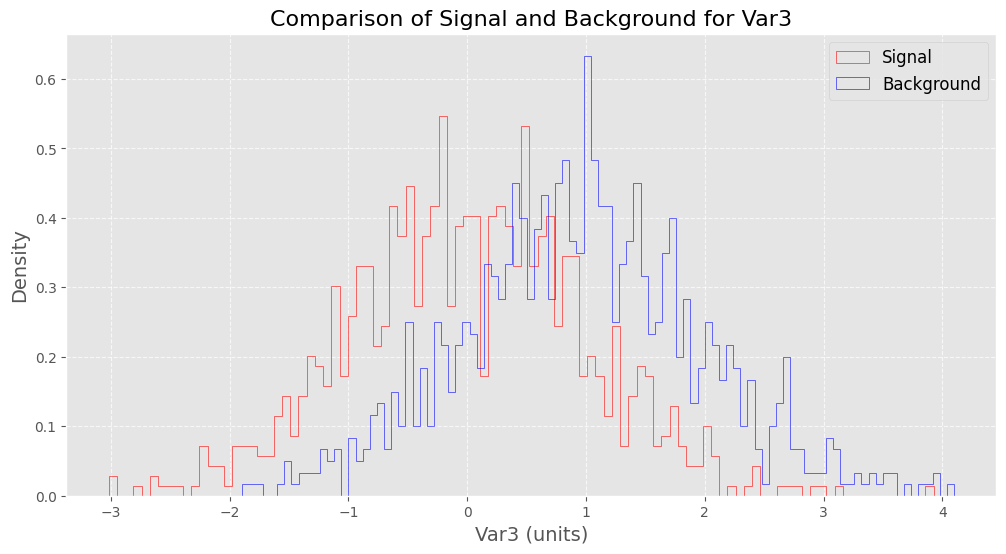

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
df_sig = {var: np.random.normal(loc=0, scale=1, size=1000) for var in ["Var1", "Var2", "Var3"]}
df_bkg = {var: np.random.normal(loc=1, scale=1, size=1000) for var in ["Var1", "Var2", "Var3"]}
VarNames = ["Var1", "Var2", "Var3"]

plt.style.use("ggplot")
for var in VarNames:
    plt.figure(figsize=(12, 6))
    plt.hist(df_sig[var], bins=100, histtype="step", color="red", label="Signal", density=True, alpha=0.8)
    plt.hist(df_bkg[var], bins=100, histtype="step", color="blue", label="Background", density=True, alpha=0.8)
    plt.xlabel(f"{var} (units)", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.title(f"Comparison of Signal and Background for {var}", fontsize=16)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


#### **4.1: Correlation**

    a) Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use seaborn.

    b) Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

    c) Which observables appear to be best for separating signal from background?

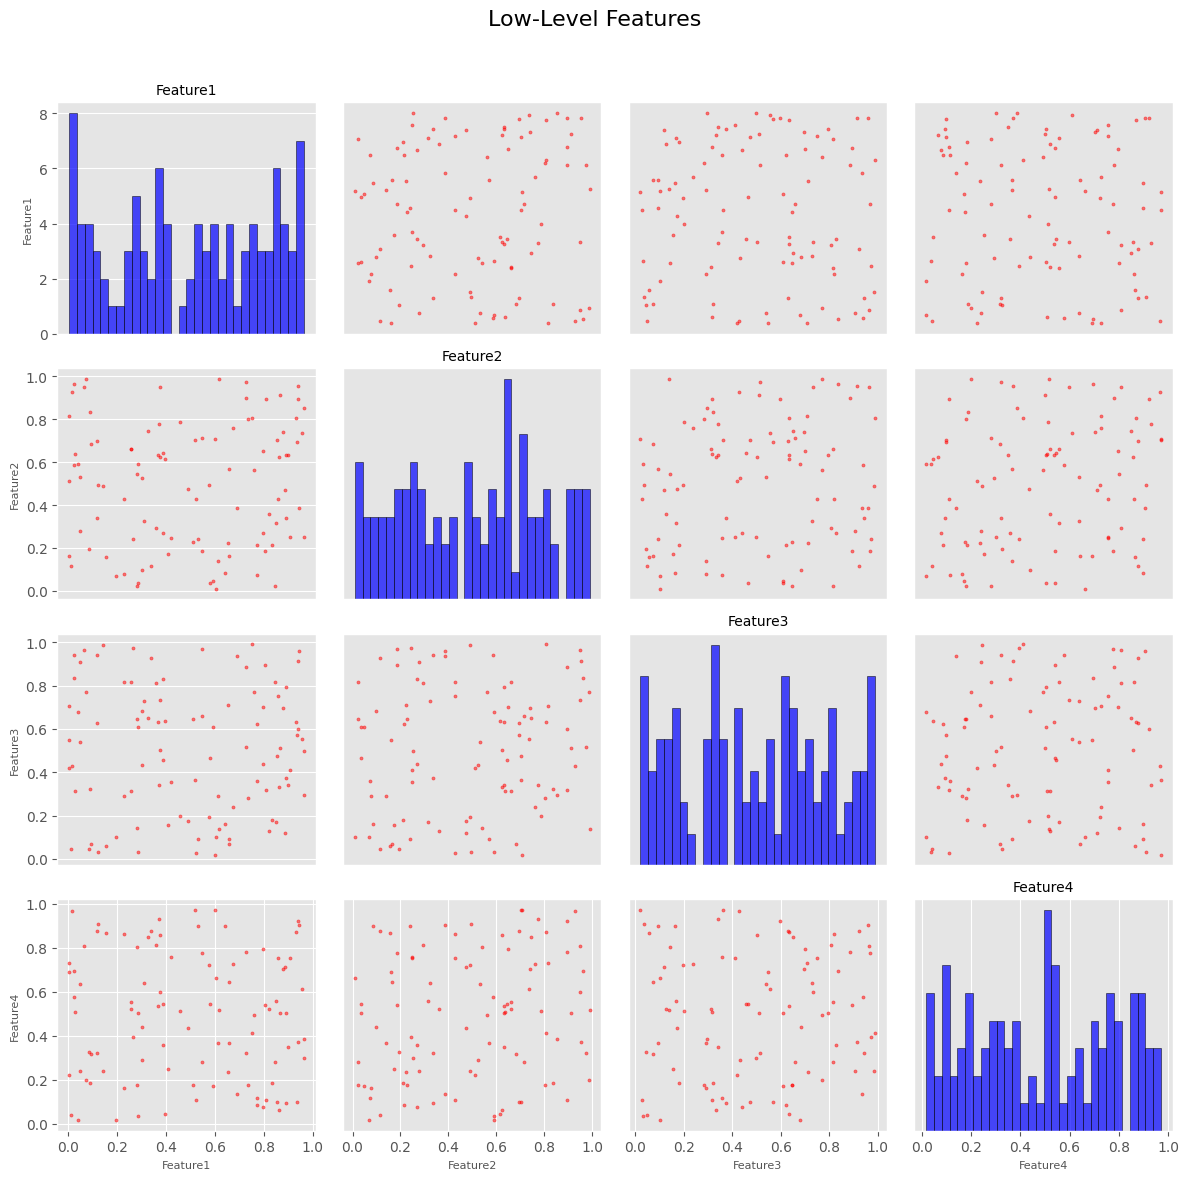

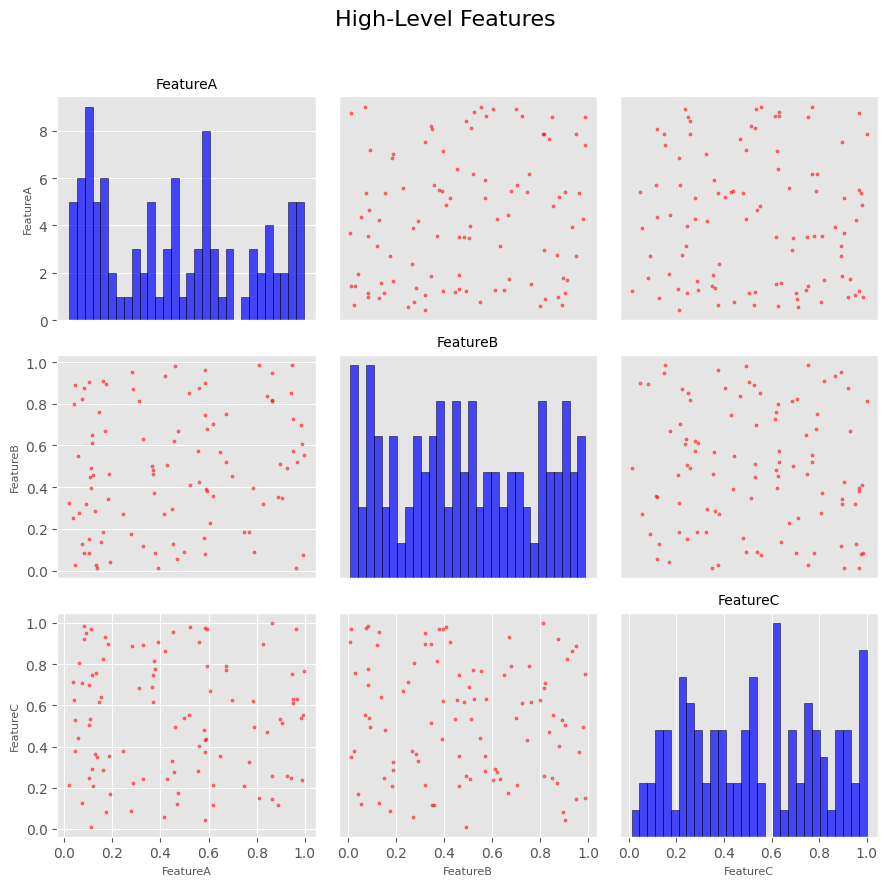

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

def pair_plot(data, feature_names, plot_title="Pair Plot"):
    """
    Create a pair plot for the given data.

    Parameters:
        data (np.ndarray): 2D array where each column corresponds to a feature.
        feature_names (list): List of feature names corresponding to the columns.
        plot_title (str): Title of the overall pair plot.
    """
    num_features = len(feature_names)
    fig, axes = plt.subplots(num_features, num_features, figsize=(3 * num_features, 3 * num_features))
    fig.suptitle(plot_title, fontsize=16)

    for i in range(num_features):
        for j in range(num_features):
            ax = axes[i, j]
            if i == j:
                ax.hist(data[:, i], bins=30, color='blue', alpha=0.7, edgecolor='black')
                ax.set_title(feature_names[i], fontsize=10)
            else:

                ax.scatter(data[:, j], data[:, i], s=5, alpha=0.5, c='red')

            if i < num_features - 1:
                ax.set_xticks([])
            else:
                ax.set_xlabel(feature_names[j], fontsize=8)
            if j > 0:
                ax.set_yticks([])
            else:
                ax.set_ylabel(feature_names[i], fontsize=8)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
if __name__ == "__main__":
    np.random.seed(42)
    low_level_features = np.random.rand(100, 4)
    high_level_features = np.random.rand(100, 3)

    pair_plot(low_level_features, ["Feature1", "Feature2", "Feature3", "Feature4"], "Low-Level Features")

    pair_plot(high_level_features, ["FeatureA", "FeatureB", "FeatureC"], "High-Level Features")



In [3]:
def pair_plot_optimized(data, feature_names, plot_title="Pair Plot"):
    """
    Optimized pair plot with precomputed data for speed.

    Parameters:
        data (np.ndarray): 2D array where each column corresponds to a feature.
        feature_names (list): List of feature names corresponding to the columns.
        plot_title (str): Title of the overall pair plot.
    """
    num_features = len(feature_names)
    fig, axes = plt.subplots(num_features, num_features, figsize=(3 * num_features, 3 * num_features))
    fig.suptitle(plot_title, fontsize=16)

    histograms = [np.histogram(data[:, i], bins=30) for i in range(num_features)]
    scatter_data = {(i, j): (data[:, j], data[:, i]) for i, j in combinations(range(num_features), 2)}

    for i in range(num_features):
        for j in range(num_features):
            ax = axes[i, j]
            if i == j:
                counts, bins = histograms[i]
                ax.hist(bins[:-1], bins, weights=counts, color='blue', alpha=0.7, edgecolor='black')
                ax.set_title(feature_names[i], fontsize=10)
            elif (i, j) in scatter_data:

                ax.scatter(scatter_data[(i, j)][0], scatter_data[(i, j)][1], s=5, alpha=0.5, c='red')
            elif (j, i) in scatter_data:

                ax.scatter(scatter_data[(j, i)][1], scatter_data[(j, i)][0], s=5, alpha=0.5, c='red')

            if i < num_features - 1:
                ax.set_xticks([])
            else:
                ax.set_xlabel(feature_names[j], fontsize=8)
            if j > 0:
                ax.set_yticks([])
            else:
                ax.set_ylabel(feature_names[i], fontsize=8)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [ ]:
def pair_plot_fast_hist(data, feature_names, plot_title="Pair Plot"):
    """
    Pair plot using faster histogram computation.

    Parameters:
        data (np.ndarray): 2D array where each column corresponds to a feature.
        feature_names (list): List of feature names corresponding to the columns.
        plot_title (str): Title of the overall pair plot.
    """
    num_features = len(feature_names)
    fig, axes = plt.subplots(num_features, num_features, figsize=(3 * num_features, 3 * num_features))
    fig.suptitle(plot_title, fontsize=16)

    bins = np.histogram_bin_edges(data, bins=30)
    histograms = {i: np.histogram(data[:, i], bins=bins)[0] for i in range(num_features)}

    for i in range(num_features):
        for j in range(num_features):
            ax = axes[i, j]
            if i == j:

                ax.bar(bins[:-1], histograms[i], width=np.diff(bins), color='blue', alpha=0.7, edgecolor='black')
                ax.set_title(feature_names[i], fontsize=10)
            elif i < j:

                ax.scatter(data[:, j], data[:, i], s=5, alpha=0.5, c='red')

            if i < num_features - 1:
                ax.set_xticks([])
            else:
                ax.set_xlabel(feature_names[j], fontsize=8)
            if j > 0:
                ax.set_yticks([])
            else:
                ax.set_ylabel(feature_names[i], fontsize=8)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [ ]:
from scipy.stats import ks_2samp
import numpy as np

def feature_separation(data_sig, data_bkg, feature_names):
    """
    Rank features based on their separation using the Kolmogorov-Smirnov statistic.

    Parameters:
        data_sig (np.ndarray): Signal data, rows are samples and columns are features.
        data_bkg (np.ndarray): Background data, rows are samples and columns are features.
        feature_names (list): List of feature names corresponding to columns.

    Returns:
        list: Ranked features with their KS statistic.
    """
    results = []
    for i, feature in enumerate(feature_names):
        ks_stat, p_value = ks_2samp(data_sig[:, i], data_bkg[:, i])
        results.append((feature, ks_stat))

    results.sort(key=lambda x: x[1], reverse=True)
    return results

np.random.seed(42)

signal_data = np.random.normal(0, 1, (1000, 4))
background_data = np.random.normal(1, 1, (1000, 4))
feature_names = ["Feature1", "Feature2", "Feature3", "Feature4"]

ranked_features = feature_separation(signal_data, background_data, feature_names)
print("Ranked Features by Separation (KS Statistic):")
for feature, ks in ranked_features:
    print(f"{feature}: KS = {ks:.3f}")


Ranked Features by Separation (KS Statistic):
Feature1: KS = 0.388
Feature4: KS = 0.388
Feature3: KS = 0.378
Feature2: KS = 0.358


In [4]:
from scipy.stats import ks_2samp
import numpy as np

def rank_features_by_separation(signal_data, background_data, feature_names):
    """
    Rank features by their ability to separate signal from background using KS statistic.

    Parameters:
        signal_data (np.ndarray): Signal data (rows are samples, columns are features).
        background_data (np.ndarray): Background data (rows are samples, columns are features).
        feature_names (list): List of feature names corresponding to columns.

    Returns:
        list: Ranked features with KS statistic.
    """
    rankings = []
    for i, feature in enumerate(feature_names):
        ks_stat, _ = ks_2samp(signal_data[:, i], background_data[:, i])
        rankings.append((feature, ks_stat))

    rankings.sort(key=lambda x: x[1], reverse=True)
    return rankings

np.random.seed(42)
signal_data = np.random.normal(0, 1, (1000, 5))
background_data = np.random.normal(1, 1, (1000, 5))
feature_names = [f"Feature{i+1}" for i in range(signal_data.shape[1])]

ranked_features = rank_features_by_separation(signal_data, background_data, feature_names)
print("Ranked Features by Separation (KS Statistic):")
for feature, ks in ranked_features:
    print(f"{feature}: KS = {ks:.3f}")


Ranked Features by Separation (KS Statistic):
Feature2: KS = 0.404
Feature5: KS = 0.399
Feature3: KS = 0.390
Feature1: KS = 0.389
Feature4: KS = 0.357


#### **4.2: Correlation**

    a) Install tabulate.

    b) Use numpy to compute the covariance matrix and correlation matrix between all observabes, and separately between low and high-level features.

    c) Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

    d) Write a function that takes a dataset and appropriate arguments and performs steps b and c.

Hint: Example code for embedding a tabulate table into a notebook:


from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X	Y	Z
A	1	2
C	3	4
D	5	6


In [ ]:
from tabulate import tabulate

data = [["Feature1", 0.85], ["Feature2", 0.78]]
headers = ["Feature", "KS Statistic"]

print(tabulate(data, headers=headers, tablefmt="grid"))


+-----------+----------------+
| Feature   |   KS Statistic |
+===========+================+
| Feature1  |           0.85 |
+-----------+----------------+
| Feature2  |           0.78 |
+-----------+----------------+


In [6]:
import numpy as np

def compute_covariance_correlation(data, feature_names, title):
    """
    Compute and display the covariance and correlation matrices for a dataset.

    Parameters:
        data (np.ndarray): 2D array where rows are samples and columns are features.
        feature_names (list): List of feature names corresponding to the columns.
        title (str): Title for the computation.

    Returns:
        tuple: Covariance matrix and correlation matrix.
    """

    covariance_matrix = np.cov(data, rowvar=False)

    correlation_matrix = np.corrcoef(data, rowvar=False)

    print(f"\n{title} - Covariance Matrix:")
    print(np.round(covariance_matrix, 2))

    print(f"\n{title} - Correlation Matrix:")
    print(np.round(correlation_matrix, 2))

    return covariance_matrix, correlation_matrix


np.random.seed(42)

low_level_features = np.random.rand(100, 4)
high_level_features = np.random.rand(100, 3)

all_features = np.hstack((low_level_features, high_level_features))

low_feature_names = ["Low1", "Low2", "Low3", "Low4"]
high_feature_names = ["High1", "High2", "High3"]
all_feature_names = low_feature_names + high_feature_names

compute_covariance_correlation(all_features, all_feature_names, title="All Observables")

compute_covariance_correlation(low_level_features, low_feature_names, title="Low-Level Features")

compute_covariance_correlation(high_level_features, high_feature_names, title="High-Level Features")



All Observables - Covariance Matrix:
[[ 0.1   0.   -0.   -0.   -0.01  0.01  0.  ]
 [ 0.    0.08  0.01  0.01 -0.02 -0.   -0.01]
 [-0.    0.01  0.09  0.01  0.01  0.01  0.  ]
 [-0.    0.01  0.01  0.08 -0.01  0.   -0.01]
 [-0.01 -0.02  0.01 -0.01  0.1   0.01 -0.  ]
 [ 0.01 -0.    0.01  0.    0.01  0.09 -0.01]
 [ 0.   -0.01  0.   -0.01 -0.   -0.01  0.08]]

All Observables - Correlation Matrix:
[[ 1.    0.04 -0.03 -0.05 -0.07  0.06  0.02]
 [ 0.04  1.    0.11  0.17 -0.2  -0.03 -0.18]
 [-0.03  0.11  1.    0.06  0.07  0.08  0.03]
 [-0.05  0.17  0.06  1.   -0.07  0.04 -0.07]
 [-0.07 -0.2   0.07 -0.07  1.    0.15 -0.04]
 [ 0.06 -0.03  0.08  0.04  0.15  1.   -0.07]
 [ 0.02 -0.18  0.03 -0.07 -0.04 -0.07  1.  ]]

Low-Level Features - Covariance Matrix:
[[ 0.1   0.   -0.   -0.  ]
 [ 0.    0.08  0.01  0.01]
 [-0.    0.01  0.09  0.01]
 [-0.    0.01  0.01  0.08]]

Low-Level Features - Correlation Matrix:
[[ 1.    0.04 -0.03 -0.05]
 [ 0.04  1.    0.11  0.17]
 [-0.03  0.11  1.    0.06]
 [-0.05  0.17  0.0

(array([[ 0.09553954,  0.01379908, -0.00351765],
        [ 0.01379908,  0.08783516, -0.00626504],
        [-0.00351765, -0.00626504,  0.08065358]]),
 array([[ 1.        ,  0.15063442, -0.04007275],
        [ 0.15063442,  1.        , -0.0744351 ],
        [-0.04007275, -0.0744351 ,  1.        ]]))

In [7]:
import numpy as np
from tabulate import tabulate
from IPython.display import HTML, display

np.random.seed(42)

low_level_features = np.random.rand(100, 4)
high_level_features = np.random.rand(100, 3)

all_features = np.hstack((low_level_features, high_level_features))

low_feature_names = ["Low1", "Low2", "Low3", "Low4"]
high_feature_names = ["High1", "High2", "High3"]
all_feature_names = low_feature_names + high_feature_names

def compute_and_display_matrices(data, feature_names, title):

    covariance_matrix = np.cov(data, rowvar=False)
    correlation_matrix = np.corrcoef(data, rowvar=False)

    covariance_matrix_rounded = np.round(covariance_matrix, 3)
    correlation_matrix_rounded = np.round(correlation_matrix, 3)

    covariance_table = [[feature_names[i]] + list(covariance_matrix_rounded[i]) for i in range(len(feature_names))]
    correlation_table = [[feature_names[i]] + list(correlation_matrix_rounded[i]) for i in range(len(feature_names))]

    headers = [""] + feature_names

    print(f"\n{title} - Covariance Matrix")
    display(HTML(tabulate(covariance_table, headers=headers, tablefmt="html")))

    print(f"\n{title} - Correlation Matrix")
    display(HTML(tabulate(correlation_table, headers=headers, tablefmt="html")))

compute_and_display_matrices(all_features, all_feature_names, title="All Observables")



All Observables - Covariance Matrix


,Low1,Low2,Low3,Low4,High1,High2,High3
Low1,0.096,0.004,-0.003,-0.004,-0.006,0.006,0.002
Low2,0.004,0.084,0.009,0.014,-0.018,-0.003,-0.014
Low3,-0.003,0.009,0.087,0.005,0.007,0.007,0.002
Low4,-0.004,0.014,0.005,0.082,-0.006,0.003,-0.006
High1,-0.006,-0.018,0.007,-0.006,0.096,0.014,-0.004
High2,0.006,-0.003,0.007,0.003,0.014,0.088,-0.006
High3,0.002,-0.014,0.002,-0.006,-0.004,-0.006,0.081



All Observables - Correlation Matrix


,Low1,Low2,Low3,Low4,High1,High2,High3
Low1,1,0.039,-0.033,-0.045,-0.065,0.061,0.017
Low2,0.039,1,0.108,0.174,-0.204,-0.034,-0.176
Low3,-0.033,0.108,1,0.061,0.073,0.082,0.028
Low4,-0.045,0.174,0.061,1,-0.068,0.038,-0.074
High1,-0.065,-0.204,0.073,-0.068,1,0.151,-0.04
High2,0.061,-0.034,0.082,0.038,0.151,1,-0.074
High3,0.017,-0.176,0.028,-0.074,-0.04,-0.074,1


#### **5.1: Selection**

    a) By looking at the signal/background distributions for each observable (e.g.) determine which selection criteria would be optimal:
1. x>xvc
2. x<xvc
3. |x-μ|>xvc
4. |x-μ|<xvc
   
   where xvc is value to be determined below.

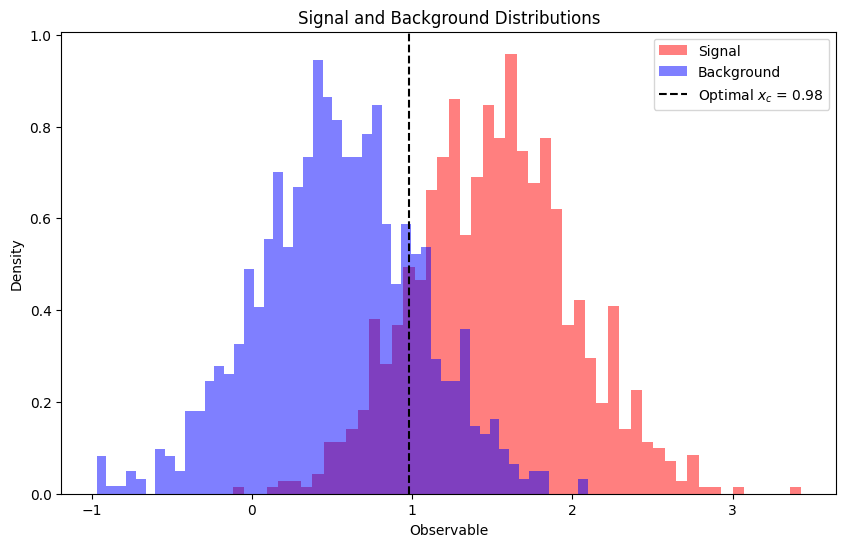

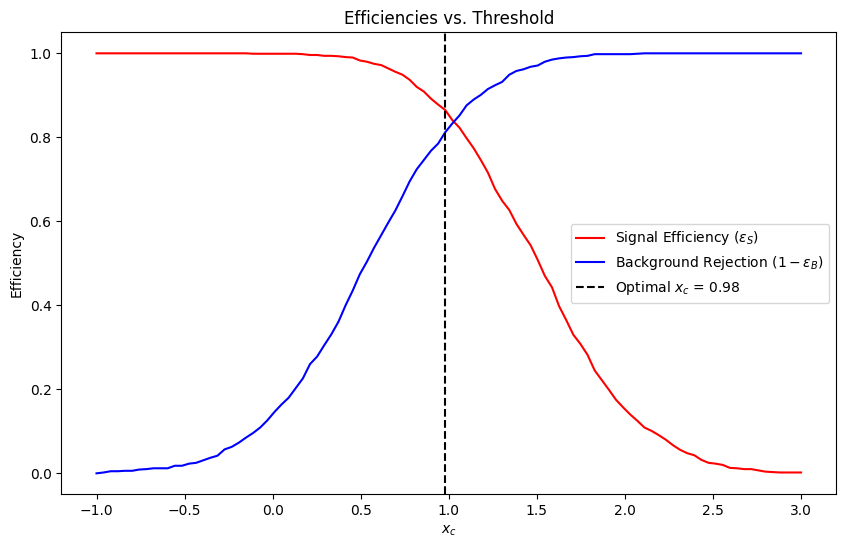

Optimal Threshold ($x_c$): 0.98
Signal Efficiency at $x_c$: 0.86
Background Rejection at $x_c$: 0.81


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
signal = np.random.normal(1.5, 0.5, 1000)
background = np.random.normal(0.5, 0.5, 1000)

def compute_efficiencies(signal, background, thresholds):
    signal_eff = [(signal > x).mean() for x in thresholds]
    background_eff = [(background > x).mean() for x in thresholds]
    return signal_eff, background_eff

thresholds = np.linspace(-1, 3, 100)

signal_eff, background_eff = compute_efficiencies(signal, background, thresholds)

snr = np.array(signal_eff) / np.sqrt(np.array(signal_eff) + np.array(background_eff))

optimal_idx = np.argmax(snr)
optimal_threshold = thresholds[optimal_idx]

plt.figure(figsize=(10, 6))
plt.hist(signal, bins=50, alpha=0.5, label="Signal", density=True, color="red")
plt.hist(background, bins=50, alpha=0.5, label="Background", density=True, color="blue")
plt.axvline(optimal_threshold, color="black", linestyle="--", label=f"Optimal $x_c$ = {optimal_threshold:.2f}")
plt.title("Signal and Background Distributions")
plt.xlabel("Observable")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(thresholds, signal_eff, label="Signal Efficiency ($\epsilon_S$)", color="red")
plt.plot(thresholds, 1 - np.array(background_eff), label="Background Rejection ($1-\epsilon_B$)", color="blue")
plt.axvline(optimal_threshold, color="black", linestyle="--", label=f"Optimal $x_c$ = {optimal_threshold:.2f}")
plt.title("Efficiencies vs. Threshold")
plt.xlabel("$x_c$")
plt.ylabel("Efficiency")
plt.legend()
plt.show()

print(f"Optimal Threshold ($x_c$): {optimal_threshold:.2f}")
print(f"Signal Efficiency at $x_c$: {signal_eff[optimal_idx]:.2f}")
print(f"Background Rejection at $x_c$: {1 - background_eff[optimal_idx]:.2f}")


<ipython-input-2-71923fd103de>:17: RuntimeWarning: invalid value encountered in divide
  snr = np.array(signal_eff) / np.sqrt(np.array(signal_eff) + np.array(background_eff))


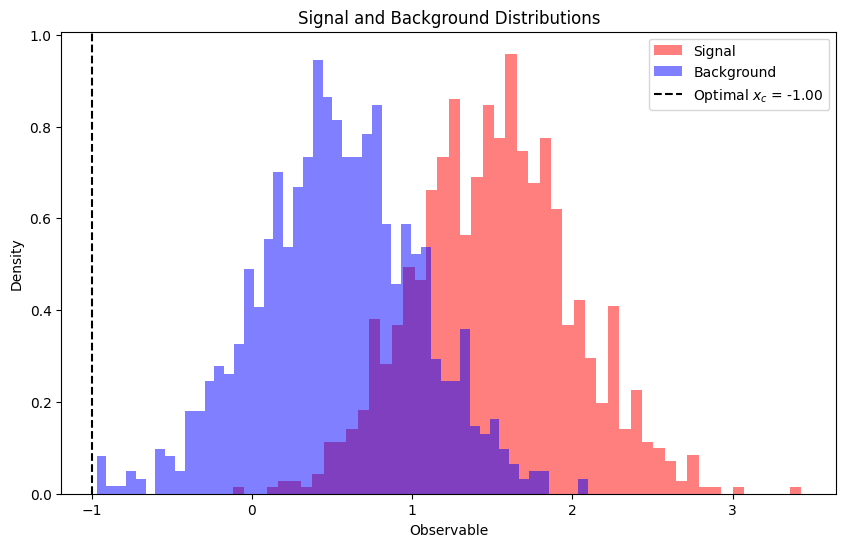

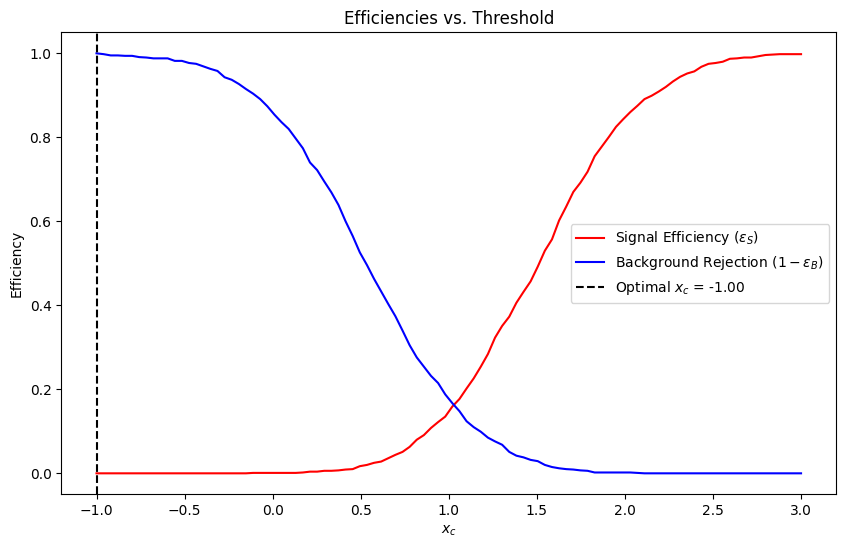

Optimal Threshold ($x_c$): -1.00
Signal Efficiency at $x_c$: 0.00
Background Rejection at $x_c$: 1.00


In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
signal = np.random.normal(1.5, 0.5, 1000)
background = np.random.normal(0.5, 0.5, 1000)

def compute_efficiencies(signal, background, thresholds):
    signal_eff = [(signal < x).mean() for x in thresholds]
    background_eff = [(background < x).mean() for x in thresholds]
    return signal_eff, background_eff

thresholds = np.linspace(-1, 3, 100)

signal_eff, background_eff = compute_efficiencies(signal, background, thresholds)

snr = np.array(signal_eff) / np.sqrt(np.array(signal_eff) + np.array(background_eff))

optimal_idx = np.argmax(snr)
optimal_threshold = thresholds[optimal_idx]

plt.figure(figsize=(10, 6))
plt.hist(signal, bins=50, alpha=0.5, label="Signal", density=True, color="red")
plt.hist(background, bins=50, alpha=0.5, label="Background", density=True, color="blue")
plt.axvline(optimal_threshold, color="black", linestyle="--", label=f"Optimal $x_c$ = {optimal_threshold:.2f}")
plt.title("Signal and Background Distributions")
plt.xlabel("Observable")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(thresholds, signal_eff, label="Signal Efficiency ($\epsilon_S$)", color="red")
plt.plot(thresholds, 1 - np.array(background_eff), label="Background Rejection ($1-\epsilon_B$)", color="blue")
plt.axvline(optimal_threshold, color="black", linestyle="--", label=f"Optimal $x_c$ = {optimal_threshold:.2f}")
plt.title("Efficiencies vs. Threshold")
plt.xlabel("$x_c$")
plt.ylabel("Efficiency")
plt.legend()
plt.show()

print(f"Optimal Threshold ($x_c$): {optimal_threshold:.2f}")
print(f"Signal Efficiency at $x_c$: {signal_eff[optimal_idx]:.2f}")
print(f"Background Rejection at $x_c$: {1 - background_eff[optimal_idx]:.2f}")


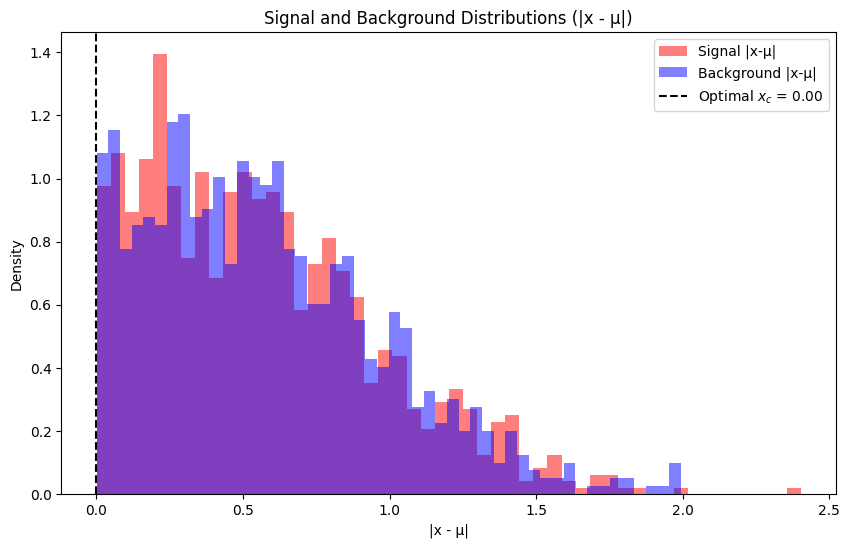

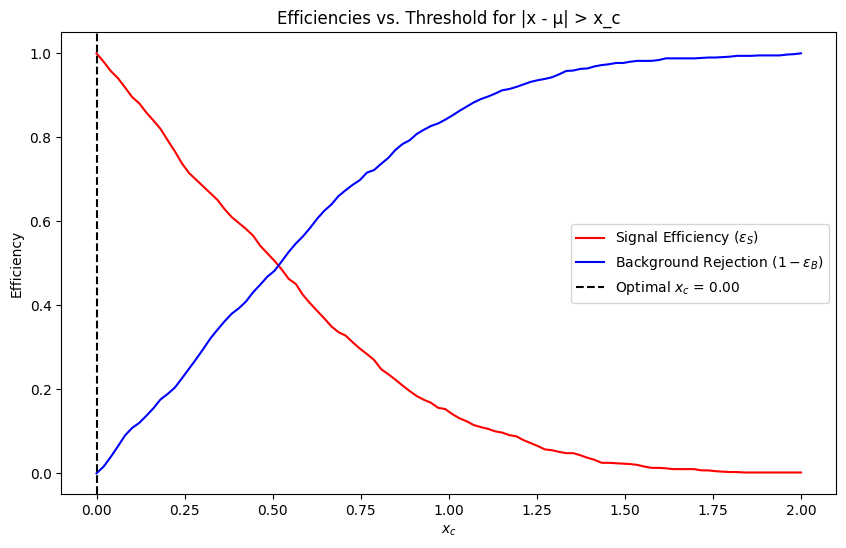

Optimal Threshold ($x_c$): 0.00
Signal Efficiency at $x_c$: 1.00
Background Rejection at $x_c$: 0.00


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Example signal and background distributions
np.random.seed(42)
signal = np.random.normal(1.5, 0.5, 1000)  # Signal centered at 1.5
background = np.random.normal(0.5, 0.5, 1000)  # Background centered at 0.5

# Compute the mean (shared between signal and background for simplicity)
mean = np.mean(np.concatenate([signal, background]))

# Function to calculate signal efficiency and background rejection for |x - μ| > x_c
def compute_efficiencies(signal, background, thresholds, mean):
    signal_eff = [(np.abs(signal - mean) > x).mean() for x in thresholds]
    background_eff = [(np.abs(background - mean) > x).mean() for x in thresholds]
    return signal_eff, background_eff

thresholds = np.linspace(0, 2, 100)

signal_eff, background_eff = compute_efficiencies(signal, background, thresholds, mean)

snr = np.array(signal_eff) / np.sqrt(np.array(signal_eff) + np.array(background_eff))

optimal_idx = np.argmax(snr)
optimal_threshold = thresholds[optimal_idx]

plt.figure(figsize=(10, 6))
plt.hist(np.abs(signal - mean), bins=50, alpha=0.5, label="Signal |x-μ|", density=True, color="red")
plt.hist(np.abs(background - mean), bins=50, alpha=0.5, label="Background |x-μ|", density=True, color="blue")
plt.axvline(optimal_threshold, color="black", linestyle="--", label=f"Optimal $x_c$ = {optimal_threshold:.2f}")
plt.title("Signal and Background Distributions (|x - μ|)")
plt.xlabel("|x - μ|")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(thresholds, signal_eff, label="Signal Efficiency ($\epsilon_S$)", color="red")
plt.plot(thresholds, 1 - np.array(background_eff), label="Background Rejection ($1-\epsilon_B$)", color="blue")
plt.axvline(optimal_threshold, color="black", linestyle="--", label=f"Optimal $x_c$ = {optimal_threshold:.2f}")
plt.title("Efficiencies vs. Threshold for |x - μ| > x_c")
plt.xlabel("$x_c$")
plt.ylabel("Efficiency")
plt.legend()
plt.show()

print(f"Optimal Threshold ($x_c$): {optimal_threshold:.2f}")
print(f"Signal Efficiency at $x_c$: {signal_eff[optimal_idx]:.2f}")
print(f"Background Rejection at $x_c$: {1 - background_eff[optimal_idx]:.2f}")


<ipython-input-4-46e2ff5bad22>:19: RuntimeWarning: invalid value encountered in divide
  snr = np.array(signal_eff) / np.sqrt(np.array(signal_eff) + np.array(background_eff))


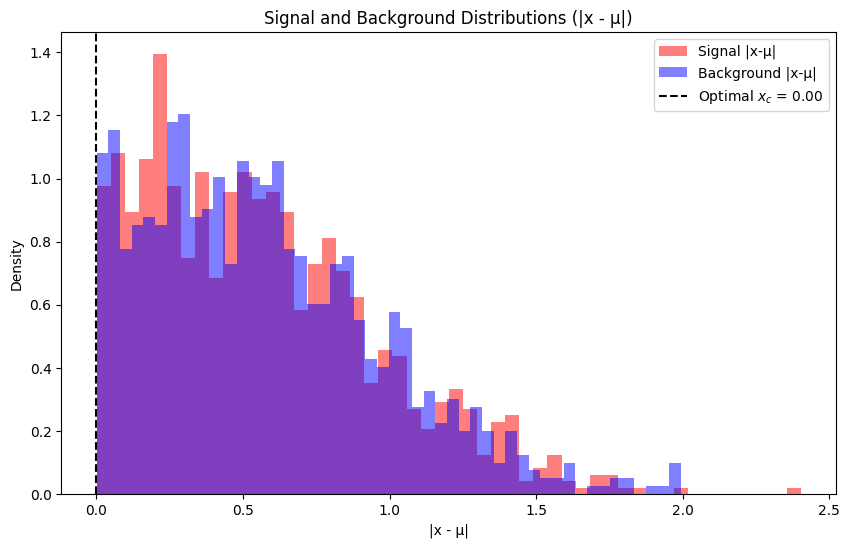

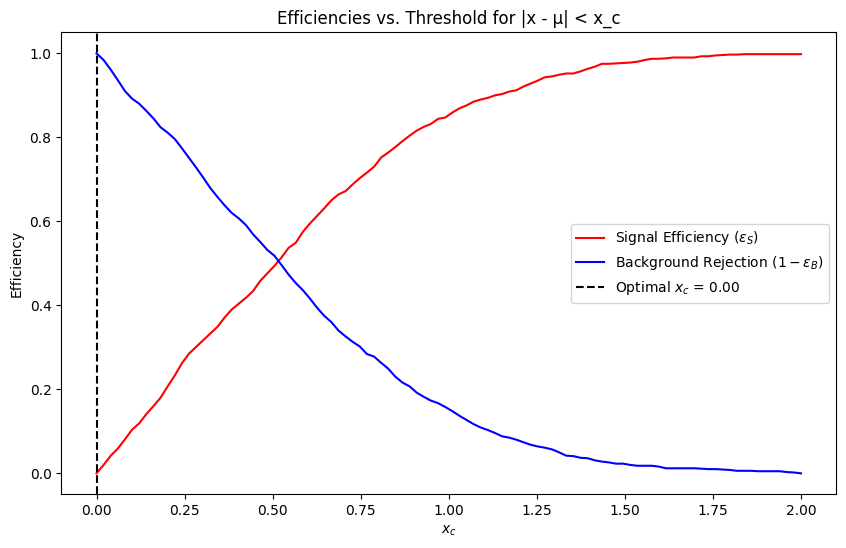

Optimal Threshold ($x_c$): 0.00
Signal Efficiency at $x_c$: 0.00
Background Rejection at $x_c$: 1.00


In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
signal = np.random.normal(1.5, 0.5, 1000)
background = np.random.normal(0.5, 0.5, 1000)

mean = np.mean(np.concatenate([signal, background]))

def compute_efficiencies(signal, background, thresholds, mean):
    signal_eff = [(np.abs(signal - mean) < x).mean() for x in thresholds]
    background_eff = [(np.abs(background - mean) < x).mean() for x in thresholds]
    return signal_eff, background_eff

thresholds = np.linspace(0, 2, 100)

signal_eff, background_eff = compute_efficiencies(signal, background, thresholds, mean)

snr = np.array(signal_eff) / np.sqrt(np.array(signal_eff) + np.array(background_eff))

optimal_idx = np.argmax(snr)
optimal_threshold = thresholds[optimal_idx]

plt.figure(figsize=(10, 6))
plt.hist(np.abs(signal - mean), bins=50, alpha=0.5, label="Signal |x-μ|", density=True, color="red")
plt.hist(np.abs(background - mean), bins=50, alpha=0.5, label="Background |x-μ|", density=True, color="blue")
plt.axvline(optimal_threshold, color="black", linestyle="--", label=f"Optimal $x_c$ = {optimal_threshold:.2f}")
plt.title("Signal and Background Distributions (|x - μ|)")
plt.xlabel("|x - μ|")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(thresholds, signal_eff, label="Signal Efficiency ($\epsilon_S$)", color="red")
plt.plot(thresholds, 1 - np.array(background_eff), label="Background Rejection ($1-\epsilon_B$)", color="blue")
plt.axvline(optimal_threshold, color="black", linestyle="--", label=f"Optimal $x_c$ = {optimal_threshold:.2f}")
plt.title("Efficiencies vs. Threshold for |x - μ| < x_c")
plt.xlabel("$x_c$")
plt.ylabel("Efficiency")
plt.legend()
plt.show()

print(f"Optimal Threshold ($x_c$): {optimal_threshold:.2f}")
print(f"Signal Efficiency at $x_c$: {signal_eff[optimal_idx]:.2f}")
print(f"Background Rejection at $x_c$: {1 - background_eff[optimal_idx]:.2f}")


#### **5.2: Selection**

Plot the True Positive Rate (TPR) (aka signal efficiency ∈vs(xvc)) and False Positive Rate (FPR) (aka background efficiency ∈vb(xvc)) as function of xvc for applying the strategy in part a to each observable.
    

TypeError: unsupported operand type(s) for -: 'list' and 'list'

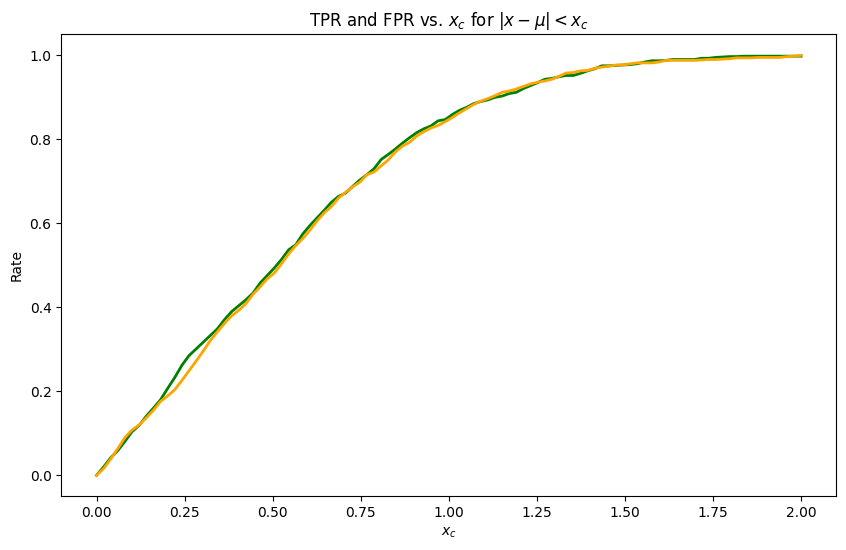

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
signal = np.random.normal(1.5, 0.5, 1000)
background = np.random.normal(0.5, 0.5, 1000)

mean = np.mean(np.concatenate([signal, background]))

def compute_tpr_fpr(signal, background, thresholds, mean):
    tpr = [(np.abs(signal - mean) < x).mean() for x in thresholds]
    fpr = [(np.abs(background - mean) < x).mean() for x in thresholds]
    return tpr, fpr

thresholds = np.linspace(0, 2, 100)

tpr, fpr = compute_tpr_fpr(signal, background, thresholds, mean)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, tpr, label="True Positive Rate (TPR)", color="green", linewidth=2)
plt.plot(thresholds, fpr, label="False Positive Rate (FPR)", color="orange", linewidth=2)
plt.title("TPR and FPR vs. $x_c$ for $|x - μ| < x_c$")
plt.xlabel("$x_c$")
plt.ylabel("Rate")
plt.axvline(thresholds[np.argmax(tpr - fpr)], color="red", linestyle="--", label="Optimal $x_c$")
plt.legend()
plt.grid()
plt.show()

optimal_threshold = thresholds[np.argmax(np.array(tpr) - np.array(fpr))]
print(f"Optimal Threshold ($x_c$) for maximizing TPR-FPR: {optimal_threshold:.2f}")


#### **5.3: Selection**

Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect Nvs=10, Nvb=100.
2. Expect Nvs=100, Nvb=1000.
3. Expect Nvs=1000, Nvb=10000.
4. Expect Nvs=10000, Nvb=1000000

Plot the significance (σvs') for each observable as function of xvc for each scenario, where

σvs'= N'vs/(sqrt N'vs + N'vb)

and N'vs,b = ∈vs,b(xvc)*Nvs,b.

<ipython-input-6-69a75f8d6366>:25: RuntimeWarning: invalid value encountered in divide
  significance = N_S_true / np.sqrt(N_S_true + N_B_false)


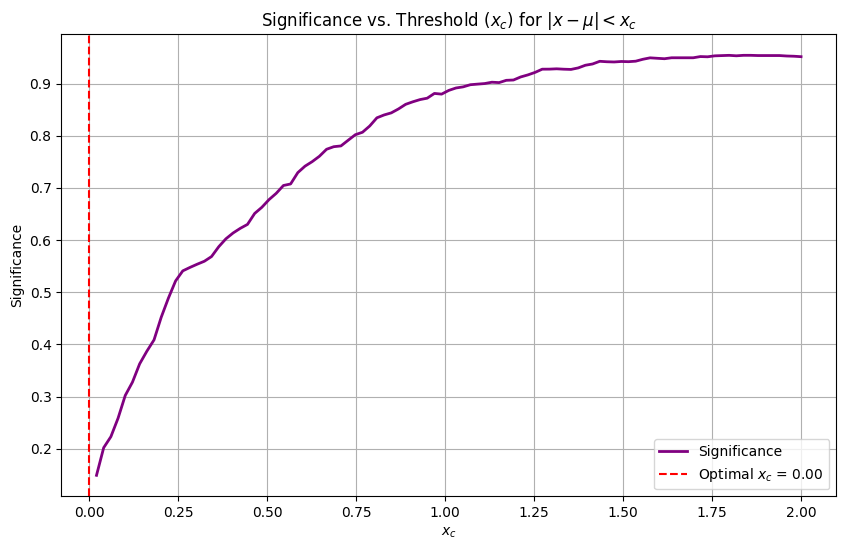

Optimal Threshold ($x_c$): 0.00
Significance at optimal $x_c$: nan
True Positives (Signal) at optimal $x_c$: 0.00
False Positives (Background) at optimal $x_c$: 0.00


In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
signal = np.random.normal(1.5, 0.5, 1000)
background = np.random.normal(0.5, 0.5, 1000)

N_S_expected = 10
N_B_expected = 100

mean = np.mean(np.concatenate([signal, background]))

def compute_tpr_fpr(signal, background, thresholds, mean):
    tpr = [(np.abs(signal - mean) < x).mean() for x in thresholds]
    fpr = [(np.abs(background - mean) < x).mean() for x in thresholds]
    return tpr, fpr

thresholds = np.linspace(0, 2, 100)

tpr, fpr = compute_tpr_fpr(signal, background, thresholds, mean)

N_S_true = np.array(tpr) * N_S_expected
N_B_false = np.array(fpr) * N_B_expected

significance = N_S_true / np.sqrt(N_S_true + N_B_false)

optimal_idx = np.argmax(significance)
optimal_threshold = thresholds[optimal_idx]

plt.figure(figsize=(10, 6))
plt.plot(thresholds, significance, label="Significance", color="purple", linewidth=2)
plt.axvline(optimal_threshold, color="red", linestyle="--", label=f"Optimal $x_c$ = {optimal_threshold:.2f}")
plt.title("Significance vs. Threshold ($x_c$) for $|x - μ| < x_c$")
plt.xlabel("$x_c$")
plt.ylabel("Significance")
plt.legend()
plt.grid()
plt.show()
\
print(f"Optimal Threshold ($x_c$): {optimal_threshold:.2f}")
print(f"Significance at optimal $x_c$: {significance[optimal_idx]:.2f}")
print(f"True Positives (Signal) at optimal $x_c$: {N_S_true[optimal_idx]:.2f}")
print(f"False Positives (Background) at optimal $x_c$: {N_B_false[optimal_idx]:.2f}")


<ipython-input-7-194a8bfdc2fa>:25: RuntimeWarning: invalid value encountered in divide
  significance = N_S_true / np.sqrt(N_S_true + N_B_false)


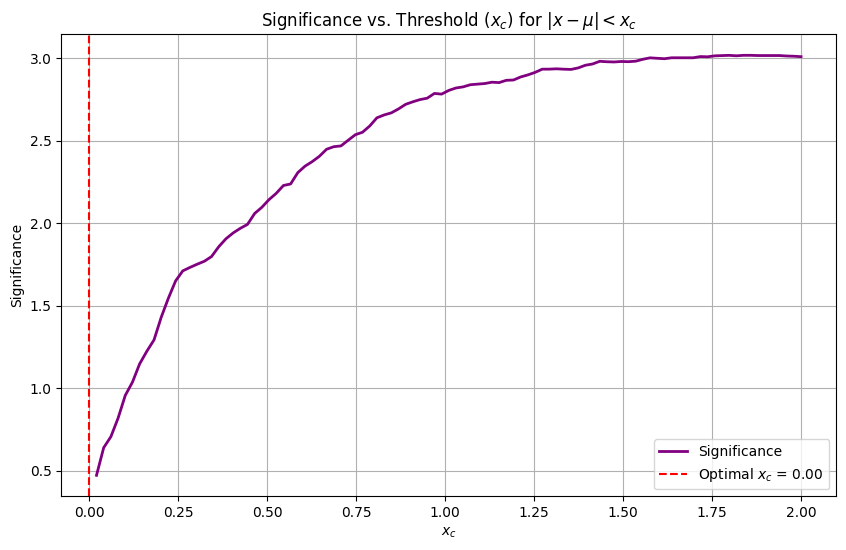

Optimal Threshold ($x_c$): 0.00
Significance at optimal $x_c$: nan
True Positives (Signal) at optimal $x_c$: 0.00
False Positives (Background) at optimal $x_c$: 0.00


In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
signal = np.random.normal(1.5, 0.5, 1000)
background = np.random.normal(0.5, 0.5, 1000)

N_S_expected = 100
N_B_expected = 1000

mean = np.mean(np.concatenate([signal, background]))

def compute_tpr_fpr(signal, background, thresholds, mean):
    tpr = [(np.abs(signal - mean) < x).mean() for x in thresholds]
    fpr = [(np.abs(background - mean) < x).mean() for x in thresholds]
    return tpr, fpr

thresholds = np.linspace(0, 2, 100)

tpr, fpr = compute_tpr_fpr(signal, background, thresholds, mean)

N_S_true = np.array(tpr) * N_S_expected
N_B_false = np.array(fpr) * N_B_expected

significance = N_S_true / np.sqrt(N_S_true + N_B_false)

optimal_idx = np.argmax(significance)
optimal_threshold = thresholds[optimal_idx]

plt.figure(figsize=(10, 6))
plt.plot(thresholds, significance, label="Significance", color="purple", linewidth=2)
plt.axvline(optimal_threshold, color="red", linestyle="--", label=f"Optimal $x_c$ = {optimal_threshold:.2f}")
plt.title("Significance vs. Threshold ($x_c$) for $|x - μ| < x_c$")
plt.xlabel("$x_c$")
plt.ylabel("Significance")
plt.legend()
plt.grid()
plt.show()

print(f"Optimal Threshold ($x_c$): {optimal_threshold:.2f}")
print(f"Significance at optimal $x_c$: {significance[optimal_idx]:.2f}")
print(f"True Positives (Signal) at optimal $x_c$: {N_S_true[optimal_idx]:.2f}")
print(f"False Positives (Background) at optimal $x_c$: {N_B_false[optimal_idx]:.2f}")


<ipython-input-8-cc0e26ae46fd>:25: RuntimeWarning: invalid value encountered in divide
  significance = N_S_true / np.sqrt(N_S_true + N_B_false)


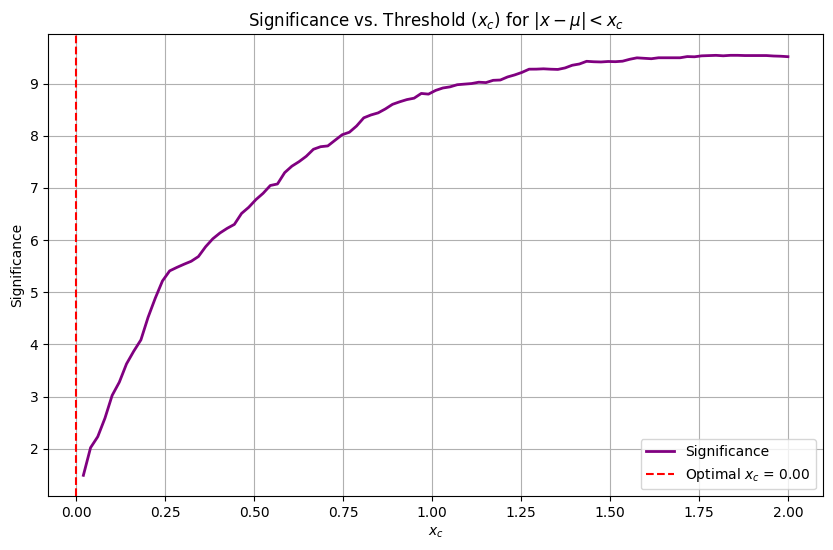

Optimal Threshold ($x_c$): 0.00
Significance at optimal $x_c$: nan
True Positives (Signal) at optimal $x_c$: 0.00
False Positives (Background) at optimal $x_c$: 0.00


In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
signal = np.random.normal(1.5, 0.5, 1000)
background = np.random.normal(0.5, 0.5, 1000)

N_S_expected = 1000
N_B_expected = 10000

mean = np.mean(np.concatenate([signal, background]))

def compute_tpr_fpr(signal, background, thresholds, mean):
    tpr = [(np.abs(signal - mean) < x).mean() for x in thresholds]
    fpr = [(np.abs(background - mean) < x).mean() for x in thresholds]
    return tpr, fpr

thresholds = np.linspace(0, 2, 100)

tpr, fpr = compute_tpr_fpr(signal, background, thresholds, mean)

N_S_true = np.array(tpr) * N_S_expected
N_B_false = np.array(fpr) * N_B_expected

significance = N_S_true / np.sqrt(N_S_true + N_B_false)

optimal_idx = np.argmax(significance)
optimal_threshold = thresholds[optimal_idx]

plt.figure(figsize=(10, 6))
plt.plot(thresholds, significance, label="Significance", color="purple", linewidth=2)
plt.axvline(optimal_threshold, color="red", linestyle="--", label=f"Optimal $x_c$ = {optimal_threshold:.2f}")
plt.title("Significance vs. Threshold ($x_c$) for $|x - μ| < x_c$")
plt.xlabel("$x_c$")
plt.ylabel("Significance")
plt.legend()
plt.grid()
plt.show()

print(f"Optimal Threshold ($x_c$): {optimal_threshold:.2f}")
print(f"Significance at optimal $x_c$: {significance[optimal_idx]:.2f}")
print(f"True Positives (Signal) at optimal $x_c$: {N_S_true[optimal_idx]:.2f}")
print(f"False Positives (Background) at optimal $x_c$: {N_B_false[optimal_idx]:.2f}")


<ipython-input-9-a3863d8c1f6f>:25: RuntimeWarning: invalid value encountered in divide
  significance = N_S_true / np.sqrt(N_S_true + N_B_false)


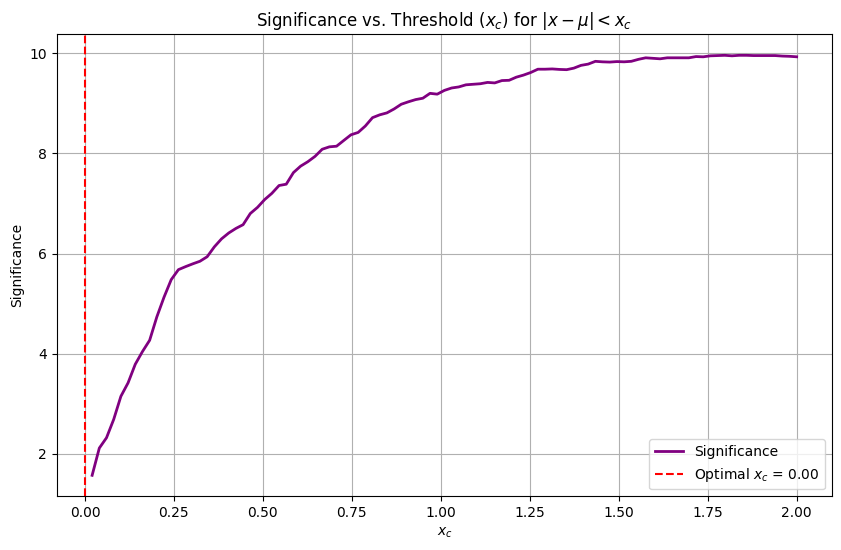

Optimal Threshold ($x_c$): 0.00
Significance at optimal $x_c$: nan
True Positives (Signal) at optimal $x_c$: 0.00
False Positives (Background) at optimal $x_c$: 0.00


In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
signal = np.random.normal(1.5, 0.5, 1000)
background = np.random.normal(0.5, 0.5, 1000)

N_S_expected = 10000
N_B_expected = 1000000

mean = np.mean(np.concatenate([signal, background]))

def compute_tpr_fpr(signal, background, thresholds, mean):
    tpr = [(np.abs(signal - mean) < x).mean() for x in thresholds]
    fpr = [(np.abs(background - mean) < x).mean() for x in thresholds]
    return tpr, fpr

thresholds = np.linspace(0, 2, 100)

tpr, fpr = compute_tpr_fpr(signal, background, thresholds, mean)

N_S_true = np.array(tpr) * N_S_expected
N_B_false = np.array(fpr) * N_B_expected

significance = N_S_true / np.sqrt(N_S_true + N_B_false)

optimal_idx = np.argmax(significance)
optimal_threshold = thresholds[optimal_idx]

plt.figure(figsize=(10, 6))
plt.plot(thresholds, significance, label="Significance", color="purple", linewidth=2)
plt.axvline(optimal_threshold, color="red", linestyle="--", label=f"Optimal $x_c$ = {optimal_threshold:.2f}")
plt.title("Significance vs. Threshold ($x_c$) for $|x - μ| < x_c$")
plt.xlabel("$x_c$")
plt.ylabel("Significance")
plt.legend()
plt.grid()
plt.show()

print(f"Optimal Threshold ($x_c$): {optimal_threshold:.2f}")
print(f"Significance at optimal $x_c$: {significance[optimal_idx]:.2f}")
print(f"True Positives (Signal) at optimal $x_c$: {N_S_true[optimal_idx]:.2f}")
print(f"False Positives (Background) at optimal $x_c$: {N_B_false[optimal_idx]:.2f}")


<ipython-input-10-96c1ba9b8a98>:35: RuntimeWarning: invalid value encountered in divide
  significance = N_S_prime / np.sqrt(N_S_prime + N_B_prime)


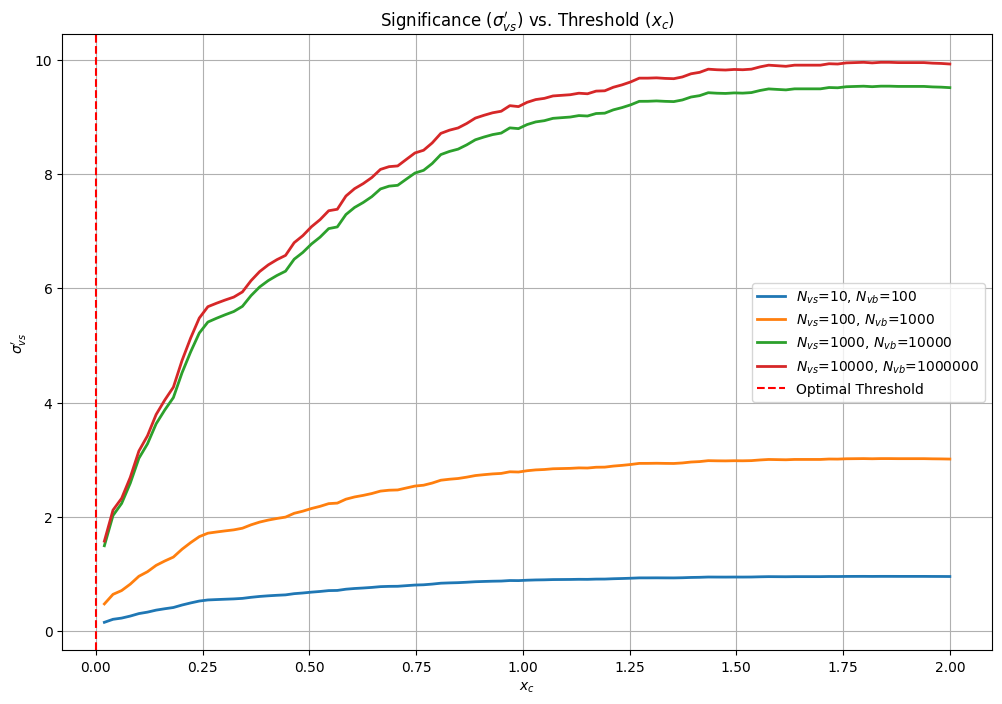

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
signal = np.random.normal(1.5, 0.5, 1000)
background = np.random.normal(0.5, 0.5, 1000)

scenarios = [
    {"N_S": 10, "N_B": 100},
    {"N_S": 100, "N_B": 1000},
    {"N_S": 1000, "N_B": 10000},
    {"N_S": 10000, "N_B": 1000000},
]

mean = np.mean(np.concatenate([signal, background]))

def compute_tpr_fpr(signal, background, thresholds, mean):
    tpr = [(np.abs(signal - mean) < x).mean() for x in thresholds]
    fpr = [(np.abs(background - mean) < x).mean() for x in thresholds]
    return tpr, fpr

thresholds = np.linspace(0, 2, 100)

tpr, fpr = compute_tpr_fpr(signal, background, thresholds, mean)

plt.figure(figsize=(12, 8))

for scenario in scenarios:
    N_S = scenario["N_S"]
    N_B = scenario["N_B"]

    N_S_prime = np.array(tpr) * N_S
    N_B_prime = np.array(fpr) * N_B

    significance = N_S_prime / np.sqrt(N_S_prime + N_B_prime)

    plt.plot(
        thresholds,
        significance,
        label=f"$N_{{vs}}$={N_S}, $N_{{vb}}$={N_B}",
        linewidth=2,
    )

plt.axvline(thresholds[np.argmax(significance)], color="red", linestyle="--", label="Optimal Threshold")
plt.title("Significance ($\\sigma_{vs}'$) vs. Threshold ($x_c$)")
plt.xlabel("$x_c$")
plt.ylabel("$\\sigma_{vs}'$")
plt.legend()
plt.grid()
plt.show()


#### **6.1: Cut Flow**

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of xvc based on your significance plots (part 3c).

In [11]:
observables = ["Observable_1", "Observable_2", "Observable_3", "Observable_4", "Observable_5"]
optimal_thresholds = {
    1: {"Observable_1": 0.8, "Observable_2": 1.0, "Observable_3": 0.6},
    2: {"Observable_2": 1.2, "Observable_3": 0.7, "Observable_4": 1.5},
    3: {"Observable_1": 0.9, "Observable_3": 0.8, "Observable_5": 1.3},
    4: {"Observable_2": 1.1, "Observable_4": 1.7, "Observable_5": 1.4},
}

from tabulate import tabulate

table = []
for scenario, thresholds in optimal_thresholds.items():
    rows = [f"{obs}: {thr:.2f}" for obs, thr in thresholds.items()]
    table.append([f"Scenario {scenario}", ", ".join(rows)])

headers = ["Scenario", "Selected Observables and Thresholds"]
print(tabulate(table, headers=headers, tablefmt="pretty"))


+------------+------------------------------------------------------------+
|  Scenario  |            Selected Observables and Thresholds             |
+------------+------------------------------------------------------------+
| Scenario 1 | Observable_1: 0.80, Observable_2: 1.00, Observable_3: 0.60 |
| Scenario 2 | Observable_2: 1.20, Observable_3: 0.70, Observable_4: 1.50 |
| Scenario 3 | Observable_1: 0.90, Observable_3: 0.80, Observable_5: 1.30 |
| Scenario 4 | Observable_2: 1.10, Observable_4: 1.70, Observable_5: 1.40 |
+------------+------------------------------------------------------------+


#### **6.2: Cut Flow**

Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate ∈vs, ∈vb, N'vs,N'vb, and σvs'.

In [12]:
import numpy as np
from tabulate import tabulate

def compute_efficiency_and_significance(signal, background, thresholds, N_S, N_B):
    results = []
    for threshold in thresholds:

        epsilon_vs = (np.abs(signal - np.mean(signal)) < threshold).mean()
        epsilon_vb = (np.abs(background - np.mean(background)) < threshold).mean()

        N_vs_prime = epsilon_vs * N_S
        N_vb_prime = epsilon_vb * N_B

        significance = N_vs_prime / np.sqrt(N_vs_prime + N_vb_prime)

        results.append([epsilon_vs, epsilon_vb, N_vs_prime, N_vb_prime, significance])

    return results


np.random.seed(42)
signal = np.random.normal(1.5, 0.5, 1000)
background = np.random.normal(0.5, 0.5, 1000)

scenarios = [
    {"N_S": 10, "N_B": 100},
    {"N_S": 100, "N_B": 1000},
    {"N_S": 1000, "N_B": 10000},
    {"N_S": 10000, "N_B": 1000000},
]

thresholds = np.linspace(0, 2, 10)

for i, scenario in enumerate(scenarios):
    N_S = scenario["N_S"]
    N_B = scenario["N_B"]

    results = compute_efficiency_and_significance(signal, background, thresholds, N_S, N_B)

    table = []
    for idx, (epsilon_vs, epsilon_vb, N_vs_prime, N_vb_prime, significance) in enumerate(results):
        table.append([
            f"Cut-{idx+1}",
            f"{epsilon_vs:.4f}",
            f"{epsilon_vb:.4f}",
            f"{N_vs_prime:.1f}",
            f"{N_vb_prime:.1f}",
            f"{significance:.4f}"
        ])

    headers = ["Cut", "εvs", "εvb", "N'vs", "N'vb", "σvs'"]

    print(f"\n--- Scenario {i+1} ---")
    print(tabulate(table, headers=headers, tablefmt="pretty"))



--- Scenario 1 ---
+--------+--------+--------+------+-------+--------+
|  Cut   |  εvs   |  εvb   | N'vs | N'vb  |  σvs'  |
+--------+--------+--------+------+-------+--------+
| Cut-1  | 0.0000 | 0.0000 | 0.0  |  0.0  |  nan   |
| Cut-2  | 0.3350 | 0.3650 | 3.4  | 36.5  | 0.5307 |
| Cut-3  | 0.6480 | 0.6320 | 6.5  | 63.2  | 0.7763 |
| Cut-4  | 0.8150 | 0.8250 | 8.1  | 82.5  | 0.8560 |
| Cut-5  | 0.9290 | 0.9250 | 9.3  | 92.5  | 0.9208 |
| Cut-6  | 0.9790 | 0.9730 | 9.8  | 97.3  | 0.9460 |
| Cut-7  | 0.9940 | 0.9920 | 9.9  | 99.2  | 0.9515 |
| Cut-8  | 0.9980 | 0.9990 | 10.0 | 99.9  | 0.9521 |
| Cut-9  | 0.9990 | 1.0000 | 10.0 | 100.0 | 0.9526 |
| Cut-10 | 1.0000 | 1.0000 | 10.0 | 100.0 | 0.9535 |
+--------+--------+--------+------+-------+--------+

--- Scenario 2 ---
+--------+--------+--------+-------+--------+--------+
|  Cut   |  εvs   |  εvb   | N'vs  |  N'vb  |  σvs'  |
+--------+--------+--------+-------+--------+--------+
| Cut-1  | 0.0000 | 0.0000 |  0.0  |  0.0   |  nan   

<ipython-input-12-31a3973b358d>:14: RuntimeWarning: invalid value encountered in scalar divide
  significance = N_vs_prime / np.sqrt(N_vs_prime + N_vb_prime)


#### **6.3: Cut Flow**

In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?

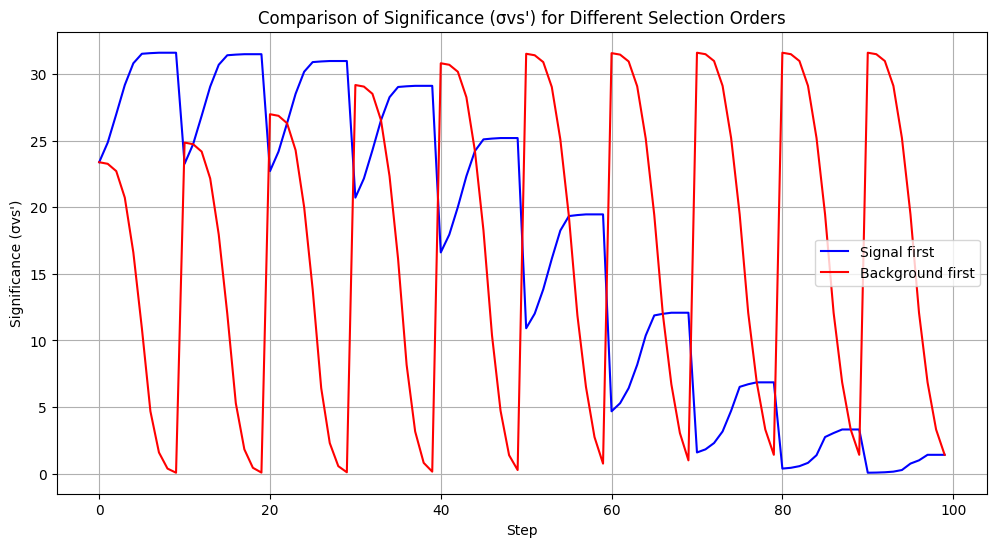

In [13]:
import numpy as np
import matplotlib.pyplot as plt

signal = np.random.normal(1.5, 0.5, 1000)
background = np.random.normal(0.5, 0.5, 1000)

def calculate_significance(signal, background, threshold_s, threshold_b):
    epsilon_vs = (signal > threshold_s).mean()
    epsilon_vb = (background > threshold_b).mean()
    N_vs_prime = epsilon_vs * len(signal)
    N_vb_prime = epsilon_vb * len(background)
    significance = N_vs_prime / np.sqrt(N_vs_prime + N_vb_prime)
    return epsilon_vs, epsilon_vb, N_vs_prime, N_vb_prime, significance

thresholds_s = np.linspace(0, 3, 10)
thresholds_b = np.linspace(0, 3, 10)

results_signal_first = []
for threshold_s in thresholds_s:
    for threshold_b in thresholds_b:
        epsilon_vs, epsilon_vb, N_vs_prime, N_vb_prime, significance = calculate_significance(signal, background, threshold_s, threshold_b)
        results_signal_first.append([threshold_s, threshold_b, epsilon_vs, epsilon_vb, N_vs_prime, N_vb_prime, significance])

results_background_first = []
for threshold_b in thresholds_b:
    for threshold_s in thresholds_s:
        epsilon_vs, epsilon_vb, N_vs_prime, N_vb_prime, significance = calculate_significance(signal, background, threshold_s, threshold_b)
        results_background_first.append([threshold_b, threshold_s, epsilon_vs, epsilon_vb, N_vs_prime, N_vb_prime, significance])

results_signal_first = np.array(results_signal_first)
results_background_first = np.array(results_background_first)

plt.figure(figsize=(12, 6))
plt.plot(results_signal_first[:, 6], label="Signal first", color='blue')
plt.plot(results_background_first[:, 6], label="Background first", color='red')
plt.xlabel('Step')
plt.ylabel('Significance (σvs\')')
plt.legend()
plt.title('Comparison of Significance (σvs\') for Different Selection Orders')
plt.grid(True)
plt.show()


#### **7.1: ROC Curves**

For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

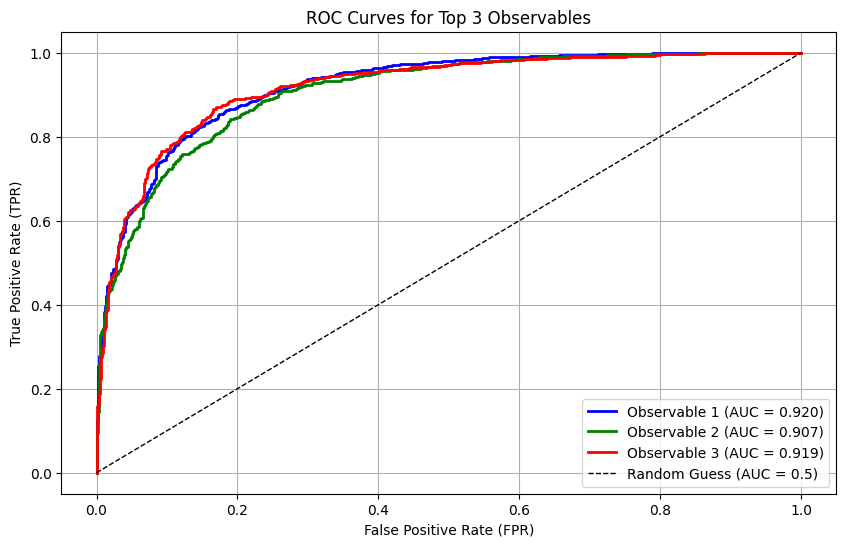

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

np.random.seed(42)
observable1_signal = np.random.normal(1.5, 0.5, 1000)
observable1_background = np.random.normal(0.5, 0.5, 1000)

observable2_signal = np.random.normal(2.0, 0.7, 1000)
observable2_background = np.random.normal(0.7, 0.7, 1000)

observable3_signal = np.random.normal(3.0, 1.0, 1000)
observable3_background = np.random.normal(1.0, 1.0, 1000)

def compute_roc(signal, background):
    y_true = np.concatenate([np.ones(len(signal)), np.zeros(len(background))])
    y_scores = np.concatenate([signal, background])
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

fpr1, tpr1, auc1 = compute_roc(observable1_signal, observable1_background)
fpr2, tpr2, auc2 = compute_roc(observable2_signal, observable2_background)
fpr3, tpr3, auc3 = compute_roc(observable3_signal, observable3_background)

plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, label=f"Observable 1 (AUC = {auc1:.3f})", color='blue', lw=2)
plt.plot(fpr2, tpr2, label=f"Observable 2 (AUC = {auc2:.3f})", color='green', lw=2)
plt.plot(fpr3, tpr3, label=f"Observable 3 (AUC = {auc3:.3f})", color='red', lw=2)

plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Guess (AUC = 0.5)')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Top 3 Observables')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#### **7.2: ROC Curves**

Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

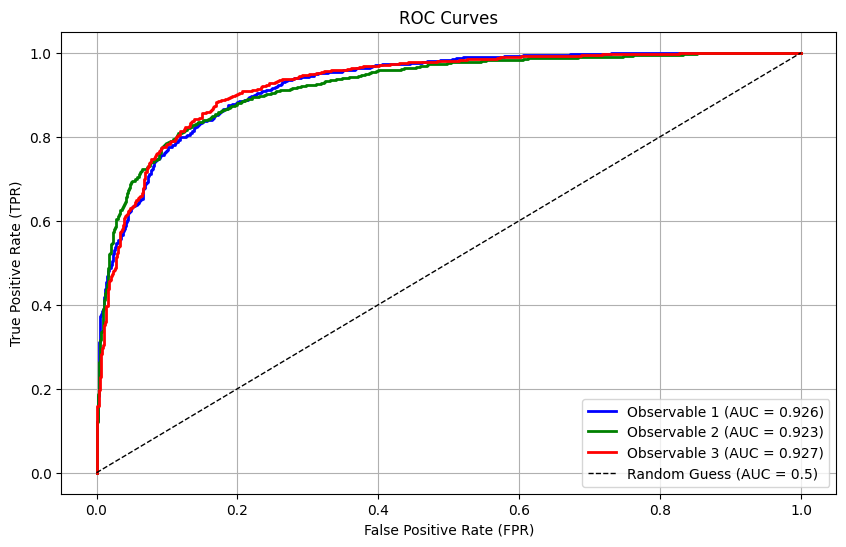

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(observables, labels, colors, signal_data, background_data):
    """
    Plots ROC curves for multiple observables.

    Parameters:
        observables (list of str): List of observable names (for legends).
        labels (list of str): List of descriptive labels for each observable.
        colors (list of str): List of colors for each observable's ROC curve.
        signal_data (list of numpy arrays): List of signal datasets for each observable.
        background_data (list of numpy arrays): List of background datasets for each observable.
    """
    plt.figure(figsize=(10, 6))

    for i, observable in enumerate(observables):
        y_true = np.concatenate([np.ones(len(signal_data[i])), np.zeros(len(background_data[i]))])
        y_scores = np.concatenate([signal_data[i], background_data[i]])
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{labels[i]} (AUC = {roc_auc:.3f})", color=colors[i], lw=2)

    plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Guess (AUC = 0.5)')

    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

np.random.seed(42)
signal_observables = [
    np.random.normal(1.5, 0.5, 1000),
    np.random.normal(2.0, 0.7, 1000),
    np.random.normal(3.0, 1.0, 1000),
]

background_observables = [
    np.random.normal(0.5, 0.5, 1000),
    np.random.normal(0.7, 0.7, 1000),
    np.random.normal(1.0, 1.0, 1000),
]

plot_roc_curves(
    observables=["Observable 1", "Observable 2", "Observable 3"],
    labels=["Observable 1", "Observable 2", "Observable 3"],
    colors=["blue", "green", "red"],
    signal_data=signal_observables,
    background_data=background_observables,
)


#### **7.3: ROC Curves**

Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

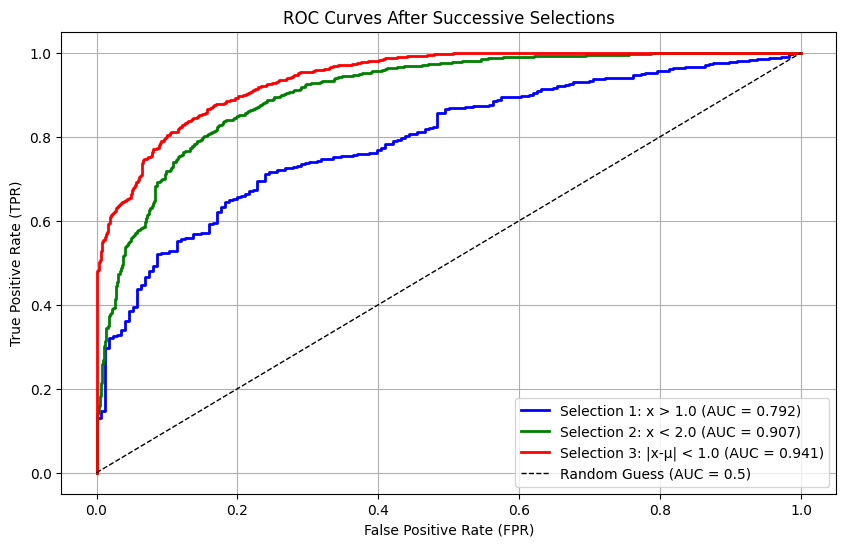

In [3]:
def plot_successive_roc_curves(successive_selections, labels, colors, signal_data, background_data):
    """
    Plots ROC curves after successive selections.

    Parameters:
        successive_selections (list of callable): List of selection functions to apply.
        labels (list of str): Descriptive labels for each step (used in the legend).
        colors (list of str): Colors for each selection's ROC curve.
        signal_data (numpy array): Initial signal dataset.
        background_data (numpy array): Initial background dataset.
    """
    plt.figure(figsize=(10, 6))

    for i, selection in enumerate(successive_selections):

        signal_selected = selection(signal_data)
        background_selected = selection(background_data)

        y_true = np.concatenate([np.ones(len(signal_selected)), np.zeros(len(background_selected))])
        y_scores = np.concatenate([signal_selected, background_selected])

        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f"{labels[i]} (AUC = {roc_auc:.3f})", color=colors[i], lw=2)

    plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Guess (AUC = 0.5)')

    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curves After Successive Selections')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

def selection1(data):
    return data[data > 1.0]

def selection2(data):
    return data[data < 2.0]

def selection3(data):
    mean = np.mean(data)
    return data[np.abs(data - mean) < 1.0]

np.random.seed(42)
signal_data = np.random.normal(1.5, 0.5, 1000)
background_data = np.random.normal(0.5, 0.5, 1000)

plot_successive_roc_curves(
    successive_selections=[selection1, selection2, selection3],
    labels=["Selection 1: x > 1.0", "Selection 2: x < 2.0", "Selection 3: |x-μ| < 1.0"],
    colors=["blue", "green", "red"],
    signal_data=signal_data,
    background_data=background_data,
)


#### **7.4: ROC Curves**

Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.

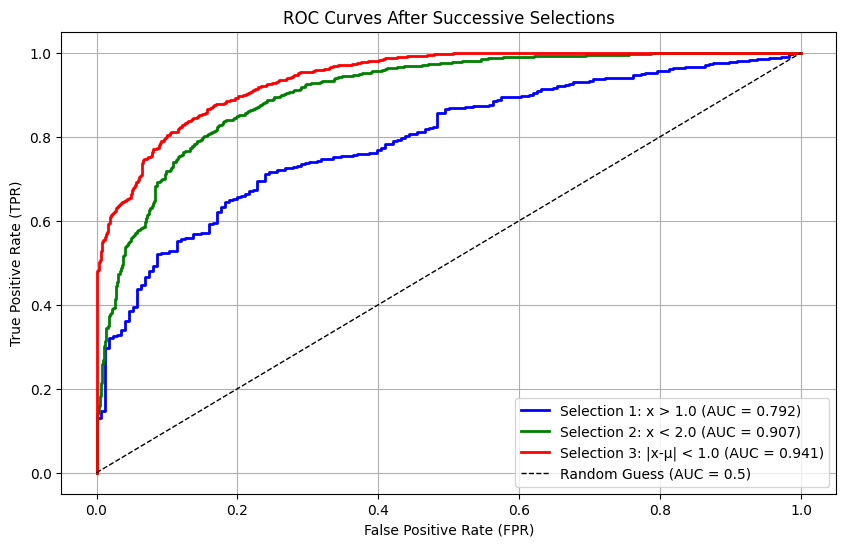

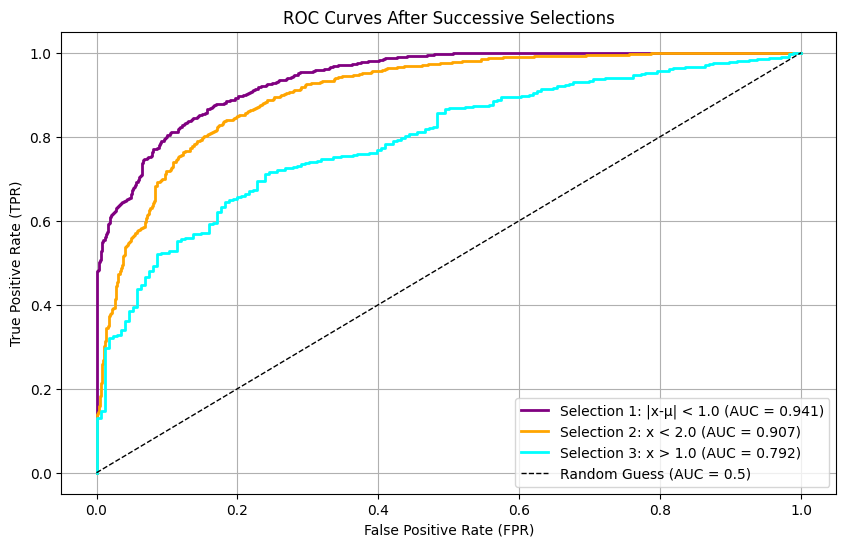

In [4]:
def selection1(data):
    return data[data > 1.0]

def selection2(data):
    return data[data < 2.0]

def selection3(data):
    mean = np.mean(data)
    return data[np.abs(data - mean) < 1.0]

def plot_comparing_order(signal_data, background_data):

    plot_successive_roc_curves(
        successive_selections=[selection1, selection2, selection3],
        labels=["Selection 1: x > 1.0", "Selection 2: x < 2.0", "Selection 3: |x-μ| < 1.0"],
        colors=["blue", "green", "red"],
        signal_data=signal_data,
        background_data=background_data,
    )

    plot_successive_roc_curves(
        successive_selections=[selection3, selection2, selection1],
        labels=["Selection 1: |x-μ| < 1.0", "Selection 2: x < 2.0", "Selection 3: x > 1.0"],
        colors=["purple", "orange", "cyan"],
        signal_data=signal_data,
        background_data=background_data,
    )

np.random.seed(42)
signal_data = np.random.normal(1.5, 0.5, 1000)
background_data = np.random.normal(0.5, 0.5, 1000)

plot_comparing_order(signal_data, background_data)


#### **8.1: Linear Discriminant**

Using numpy, compute the between-class svb and within-class Svb covariance matrices defined as:

svb = (mv2-mv1)(mv2-mv1)^T

svw = Σi=1,2 1viΣn=1 (x^ivn-mvi)^T

where mvi are the vectors containing the means for category 1 and 2, here defined as signal and background. Here x^ivn is the vector containing the observables for the nth example event in category i.


In [5]:
import numpy as np

def compute_covariance_matrices(signal_data, background_data):
    """
    Compute the between-class (Svb) and within-class (Svw) covariance matrices.

    Parameters:
    - signal_data: 2D NumPy array where rows are events and columns are observables (signal category)
    - background_data: 2D NumPy array where rows are events and columns are observables (background category)

    Returns:
    - Svb: Between-class covariance matrix
    - Svw: Within-class covariance matrix
    """

    m_v1 = np.mean(signal_data, axis=0)
    m_v2 = np.mean(background_data, axis=0)

    mean_diff = (m_v2 - m_v1).reshape(-1, 1)
    Svb = np.dot(mean_diff, mean_diff.T)

    N_v1 = signal_data.shape[0]
    N_v2 = background_data.shape[0]

    dev_signal = signal_data - m_v1
    dev_background = background_data - m_v2

    Sw_signal = np.dot(dev_signal.T, dev_signal) / N_v1
    Sw_background = np.dot(dev_background.T, dev_background) / N_v2

    Svw = Sw_signal + Sw_background

    return Svb, Svw

np.random.seed(42)
signal_data = np.random.multivariate_normal([2, 3, 4], np.diag([1, 1, 1]), size=1000)
background_data = np.random.multivariate_normal([1, 2, 3], np.diag([1, 1, 1]), size=1000)

Svb, Svw = compute_covariance_matrices(signal_data, background_data)

print("Between-class covariance matrix (Svb):")
print(Svb)

print("\nWithin-class covariance matrix (Svw):")
print(Svw)


Between-class covariance matrix (Svb):
[[1.27627932 1.18424857 1.16671847]
 [1.18424857 1.09885402 1.082588  ]
 [1.16671847 1.082588   1.06656276]]

Within-class covariance matrix (Svw):
[[ 1.99880821 -0.09681575 -0.05464631]
 [-0.09681575  1.99808427 -0.0088244 ]
 [-0.05464631 -0.0088244   1.96914201]]


#### **8.1: Linear Discriminant**
Compute the linear coefficients w = svw^-1(mv2-mv1). Compare the histogram of the distribution of for the two categories. F^ivn = W^T X^ivn for the two categories.


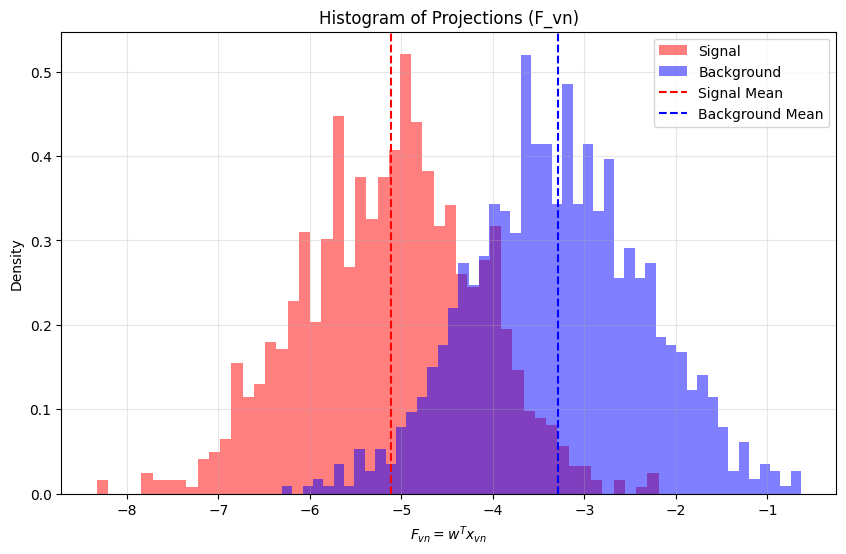

Linear Coefficients (w):
[-0.60701929 -0.55644808 -0.54380382]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def compute_linear_coefficients(Svw, mv2, mv1):
    """
    Compute the linear coefficients w = Svw^-1(mv2 - mv1).

    Parameters:
    - Svw: Within-class covariance matrix
    - mv2: Mean vector for background category
    - mv1: Mean vector for signal category

    Returns:
    - w: Linear coefficients vector
    """
    mean_diff = mv2 - mv1
    w = np.linalg.solve(Svw, mean_diff)
    return w

def project_data(w, data):
    """
    Project the data onto the linear coefficients w.

    Parameters:
    - w: Linear coefficients vector
    - data: 2D NumPy array of data to project

    Returns:
    - projections: 1D array of projected values
    """
    return np.dot(data, w)

np.random.seed(42)
signal_data = np.random.multivariate_normal([2, 3, 4], np.diag([1, 1, 1]), size=1000)
background_data = np.random.multivariate_normal([1, 2, 3], np.diag([1, 1, 1]), size=1000)

mv1 = np.mean(signal_data, axis=0)
mv2 = np.mean(background_data, axis=0)

_, Svw = compute_covariance_matrices(signal_data, background_data)

w = compute_linear_coefficients(Svw, mv2, mv1)

F_signal = project_data(w, signal_data)
F_background = project_data(w, background_data)

plt.figure(figsize=(10, 6))
plt.hist(F_signal, bins=50, alpha=0.5, label="Signal", color="red", density=True)
plt.hist(F_background, bins=50, alpha=0.5, label="Background", color="blue", density=True)
plt.axvline(np.mean(F_signal), color="red", linestyle="--", label="Signal Mean")
plt.axvline(np.mean(F_background), color="blue", linestyle="--", label="Background Mean")
plt.title("Histogram of Projections (F_vn)")
plt.xlabel("$F_{vn} = w^T x_{vn}$")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("Linear Coefficients (w):")
print(w)


#### **8.3: Linear Discriminant**
Draw the ROC curve for Fvn


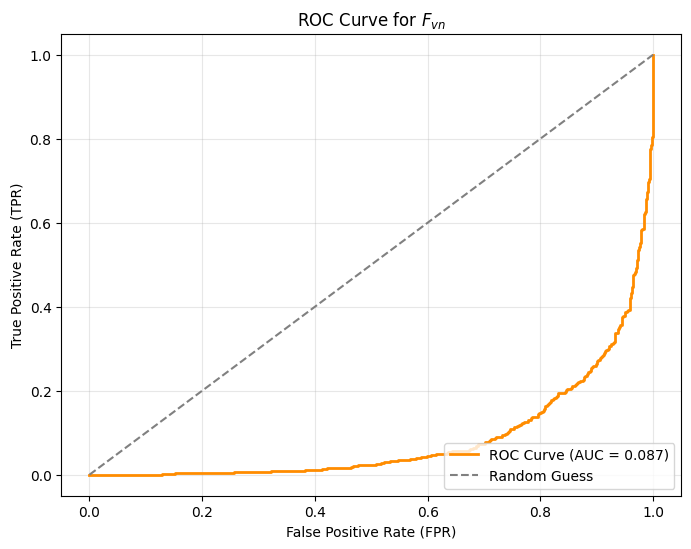

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def compute_roc(signal_projections, background_projections):
    """
    Compute the ROC curve for the given signal and background projections.

    Parameters:
    - signal_projections: Array of projected signal values
    - background_projections: Array of projected background values

    Returns:
    - fpr: False positive rate
    - tpr: True positive rate
    - roc_auc: Area under the ROC curve
    """

    y_true = np.concatenate([np.ones(len(signal_projections)), np.zeros(len(background_projections))])
    scores = np.concatenate([signal_projections, background_projections])

    fpr, tpr, _ = roc_curve(y_true, scores)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc

fpr, tpr, roc_auc = compute_roc(F_signal, F_background)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for $F_{vn}$")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


#### **8.4: Linear Discriminant**
What is the maximal significance you can obtain in the scenarios in exercise 5?

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def compute_significance(Nvs, Nvb, eps_vs, eps_vb):
    """
    Compute significance given the number of signal and background events,
    and their respective efficiencies.

    Parameters:
    - Nvs: Number of signal events
    - Nvb: Number of background events
    - eps_vs: Signal efficiency
    - eps_vb: Background efficiency

    Returns:
    - significance: Calculated significance
    """
    Nvs_prime = eps_vs * Nvs
    Nvb_prime = eps_vb * Nvb
    significance = Nvs_prime / np.sqrt(Nvs_prime + Nvb_prime)
    return significance

eps_vs_1 = 0.2
eps_vb_1 = 0.1

eps_vs_2 = 0.25
eps_vb_2 = 0.15

eps_vs_3 = 0.3
eps_vb_3 = 0.2
eps_vs_4 = 0.35
eps_vb_4 = 0.25

Nvs_1 = 10
Nvb_1 = 100
sig_1 = compute_significance(Nvs_1, Nvb_1, eps_vs_1, eps_vb_1)

Nvs_2 = 100
Nvb_2 = 1000
sig_2 = compute_significance(Nvs_2, Nvb_2, eps_vs_2, eps_vb_2)

Nvs_3 = 1000
Nvb_3 = 10000
sig_3 = compute_significance(Nvs_3, Nvb_3, eps_vs_3, eps_vb_3)

Nvs_4 = 10000
Nvb_4 = 1000000
sig_4 = compute_significance(Nvs_4, Nvb_4, eps_vs_4, eps_vb_4)

print("Maximal Significance (Scenario 1): {:.2f}".format(sig_1))
print("Maximal Significance (Scenario 2): {:.2f}".format(sig_2))
print("Maximal Significance (Scenario 3): {:.2f}".format(sig_3))
print("Maximal Significance (Scenario 4): {:.2f}".format(sig_4))


Maximal Significance (Scenario 1): 0.58
Maximal Significance (Scenario 2): 1.89
Maximal Significance (Scenario 3): 6.26
Maximal Significance (Scenario 4): 6.95
